In [1]:
import os
import pandas as pd
import numpy as np
import DataGenerator

In [2]:
data = pd.read_csv('MAMe_metadata/MAMe_dataset.csv')
data.head()

,Image file,Medium,Museum,Museum-based instance ID,Subset,Width,Height,Product size,Aspect ratio
0,436018.jpg,Oil on canvas,Metropolitan Museum of Art,29.100.60,train,3144.0,3840.0,12072960.0,0.8187
1,11779.jpg,Oil on canvas,Metropolitan Museum of Art,1982.373,train,1707.0,2136.0,3646152.0,0.7992
2,19022.jpg,Oil on canvas,Metropolitan Museum of Art,2006.418,train,2845.0,3811.0,10842295.0,0.7465
3,435883.jpg,Oil on canvas,Metropolitan Museum of Art,61.101.3,train,3811.0,2916.0,11112876.0,1.3069
4,10481.jpg,Oil on canvas,Metropolitan Museum of Art,09.95,train,3811.0,2099.0,7999289.0,1.8156


In [3]:
print( 'Train: ' + str(len(data[data['Subset']=='train'])))
print( 'Test: ' + str(len(data[data['Subset']=='test'])))
print( 'Validation: ' + str(len(data[data['Subset']=='val'])))

Train: 20300
Test: 15657
Validation: 1450


In [4]:
data.describe()

,Width,Height,Product size,Aspect ratio
count,37407.000000,37407.000000,3.740700e+04,37407.000000
mean,2841.856711,2995.828936,1.032388e+07,1.028169
std,1573.004179,1601.247010,1.231509e+07,0.478613
min,224.000000,235.000000,2.502400e+05,0.112300
25%,1824.000000,1918.500000,3.408000e+06,0.704100
50%,2667.000000,2900.000000,8.104191e+06,0.910500
75%,3773.000000,3842.000000,1.209547e+07,1.303550
max,32683.000000,23577.000000,3.729784e+08,15.001900


<AxesSubplot:>

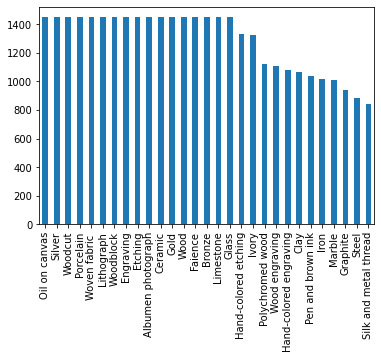

In [5]:
counts = data['Medium'].value_counts()
counts.plot.bar()

In [10]:
data[['Medium', 'Width', 'Height', 'Product size', 'Aspect ratio']].groupby('Medium').agg('mean')

,Width,Height,Product size,Aspect ratio
Medium,,,,
Albumen photograph,1699.927586,2197.318621,4.495909e+06,0.751222
Bronze,3128.264138,3245.673793,1.237354e+07,1.046439
Ceramic,2942.602069,3182.571034,1.199242e+07,0.981807
Clay,1428.923801,1413.360301,2.976883e+06,1.080706
Engraving,3076.868276,3475.908966,1.183093e+07,0.961106
Etching,3169.152414,3216.182759,1.081763e+07,1.052526
Faience,2477.164138,2940.226207,8.629919e+06,0.885853
Glass,2865.691034,3026.499310,1.043057e+07,1.006064
Gold,2231.232414,1936.812414,5.517806e+06,1.193642


In [20]:
train = data[data['Subset']=='train'][['Medium', 'Width', 'Height', 'Product size', 'Aspect ratio']]
test = data[data['Subset']=='test'][['Medium', 'Width', 'Height', 'Product size', 'Aspect ratio']]

train_x = train[[ 'Width', 'Height', 'Product size', 'Aspect ratio']]
train_y = train[['Medium']]

test_x = test[[ 'Width', 'Height', 'Product size', 'Aspect ratio']]
test_y = test[['Medium']]

In [21]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)

In [23]:
preds = clf.predict(test_x)

0.28600625918119693


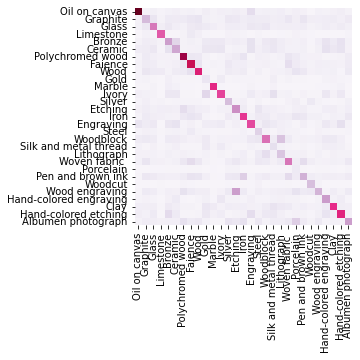

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

target_names = test['Medium'].unique()

cf_matrix = confusion_matrix(test_y, preds)
sns.heatmap(cf_matrix, annot=False, cmap='PuRd', cbar=False, square=True, xticklabels=target_names,
                yticklabels=target_names)


print(accuracy_score(test_y, preds))

In [37]:
len(target_names)

29